In [3]:
import numpy as np
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

In [12]:
# Load and preprocess the data
max_features = 400
maxlen = 300

In [13]:
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=max_features)
X_train = pad_sequences(X_train, maxlen=maxlen)
X_test = pad_sequences(X_test, maxlen=maxlen)

In [14]:
# Define the LSTM model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(4))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'], run_eagerly=True)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, None, 32)          12800     
                                                                 
 lstm_3 (LSTM)               (None, 4)                 592       
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 13397 (52.33 KB)
Trainable params: 13397 (52.33 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [15]:
# Fit the model
model.fit(X_train, y_train, epochs=10, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/10
391/391 [==============================] - 61s 150ms/step - loss: 0.6013 - accuracy: 0.6756 - val_loss: 0.5166 - val_accuracy: 0.7660
Epoch 2/10
391/391 [==============================] - 56s 144ms/step - loss: 0.5067 - accuracy: 0.7638 - val_loss: 0.4932 - val_accuracy: 0.7741
Epoch 3/10
391/391 [==============================] - 56s 144ms/step - loss: 0.4674 - accuracy: 0.7923 - val_loss: 0.4430 - val_accuracy: 0.8030
Epoch 4/10
391/391 [==============================] - 57s 145ms/step - loss: 0.4338 - accuracy: 0.8098 - val_loss: 0.4227 - val_accuracy: 0.8140
Epoch 5/10
391/391 [==============================] - 57s 145ms/step - loss: 0.4169 - accuracy: 0.8168 - val_loss: 0.4313 - val_accuracy: 0.8039
Epoch 6/10
391/391 [==============================] - 57s 145ms/step - loss: 0.4129 - accuracy: 0.8157 - val_loss: 0.4554 - val_accuracy: 0.7844
Epoch 7/10
391/391 [==============================] - 57s 145ms/step - loss: 0.4104 - accuracy: 0.8176 - val_loss: 0.4160 - val_ac

In [16]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Loss: {loss}, Accuracy: {accuracy}') 

782/782 [==============================] - 38s 48ms/step - loss: 0.4070 - accuracy: 0.8181
Loss: 0.406961053609848, Accuracy: 0.8180800676345825


<function sklearn.metrics._classification.confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None, normalize=None)>

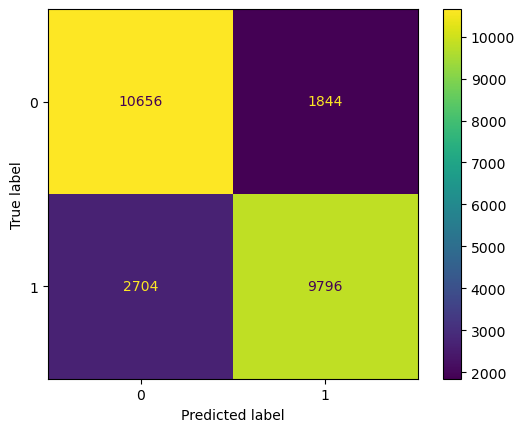

In [24]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, (predictions > 0.5).astype(int))
ConfusionMatrixDisplay(cm).plot()
confusion_matrix
